# **Customer Churn Prediction using Trained Model**
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### Objectives:

* Cleaning the Data.
* Feature Analysis.
* Label Encoding.
* Feature Selection.
* Hypothesis Generation and Testing.
* Analyzing the Selected Features.
* Comparing Classification Models.
* Model Evaluation.
* Making Predictions.

### Table of Contents
1. [Loading and Initial Data Preprocessing](#loading-and-initial-data-preprocessing)
2. [Feature Analysis](#feature-analysis)
3. [TotalCharges and Tenure Analysis](#totalcharges-and-tenure-analysis)
4. [Label Encoding for Categorical Features](#label-encoding-for-categorical-features)
5. [Feature Selection](#feature-selection)
6. [Feature-Specific Accuracy Calculation using Logistic Regression](#Feature_Specific_Accuracy_Calculation_using_Logistic_Regression)
7. [Hypothesis Testing using Chi-Square Test](#hypothesis-testing-using-chi-square-test)
8. [Proportion of Churned Customers by Categorical Variable](#proportion-of-churned-customers-by-categorical-variable)
9. [Visualizing Churn Analysis](#visualizing-churn-analysis)
10. [Comparing Classification Models](#comparing-classification-models)
11. [Logistic Regression Model Evaluation and Confusion Matrix](#logistic-regression-model-evaluation-and-confusion-matrix)
12. [Making Predictions with a Trained Model](#making-predictions-with-a-trained-model)


### Importing Libraries and Modules
Importing necessary libraries and modules required for data analysis, visualization, preprocessing, and machine learning..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import jaccard_score
from sklearn.feature_selection import GenericUnivariateSelect, chi2, f_classif 
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import Perceptron
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

### Loading and Initial Data Preprocessing
Loading the dataset and performing initial preprocessing steps such as renaming columns, setting display options, dropping irrelevant columns, and handling missing data and categorical values.

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.columns = df.columns.str[0].str.upper() + df.columns.str[1:]
pd.set_option('display.max_columns', 21)
df.drop(columns='CustomerID', inplace=True)
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')
df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']] = df[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')
df.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 20)

In [4]:
df.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   Tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Feature Analysis
Visualizing features in the dataset to gain insights into their distribution and patterns.

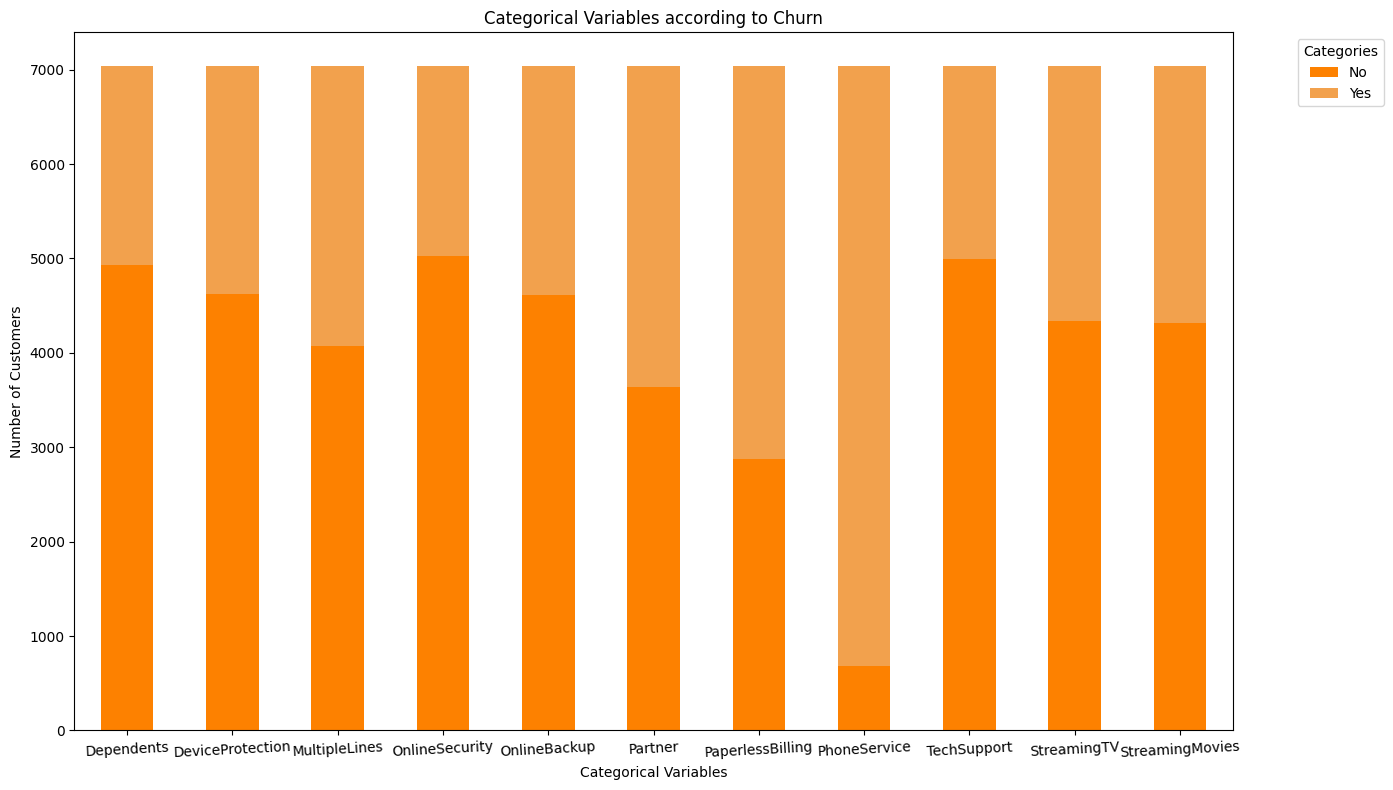

In [7]:
binary_categorical = ['Dependents','DeviceProtection','MultipleLines','OnlineSecurity', 'OnlineBackup',
                      'Partner','PaperlessBilling','PhoneService','TechSupport',  'StreamingTV', 'StreamingMovies']


 

# Initialize a figure and axis
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)

custom_colors = ['#fd8100', '#f2a14d']

# Plotting grouped bar chart
plot_data = df[binary_categorical].apply(pd.Series.value_counts).T
plot_data = plot_data.reindex(sorted(plot_data.columns), axis=1)

plot = plot_data.plot(kind='bar', stacked=True, ax=ax, color = custom_colors)


# Adding labels and title
plt.xlabel('Categorical Variables')
plt.ylabel('Number of Customers')  # Update the ylabel
plt.title('Categorical Variables according to Churn')  # Update the title

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=3)

# Move the legend outside the graph
handles, labels = ax.get_legend_handles_labels()
new_labels = ['No', 'Yes']  
ax.legend(handles, new_labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
   

# Sort the columns in alphabetical order
df_sorted = df.reindex(sorted(df.columns), axis=1)

# Show the plot
plt.tight_layout()
plt.show()

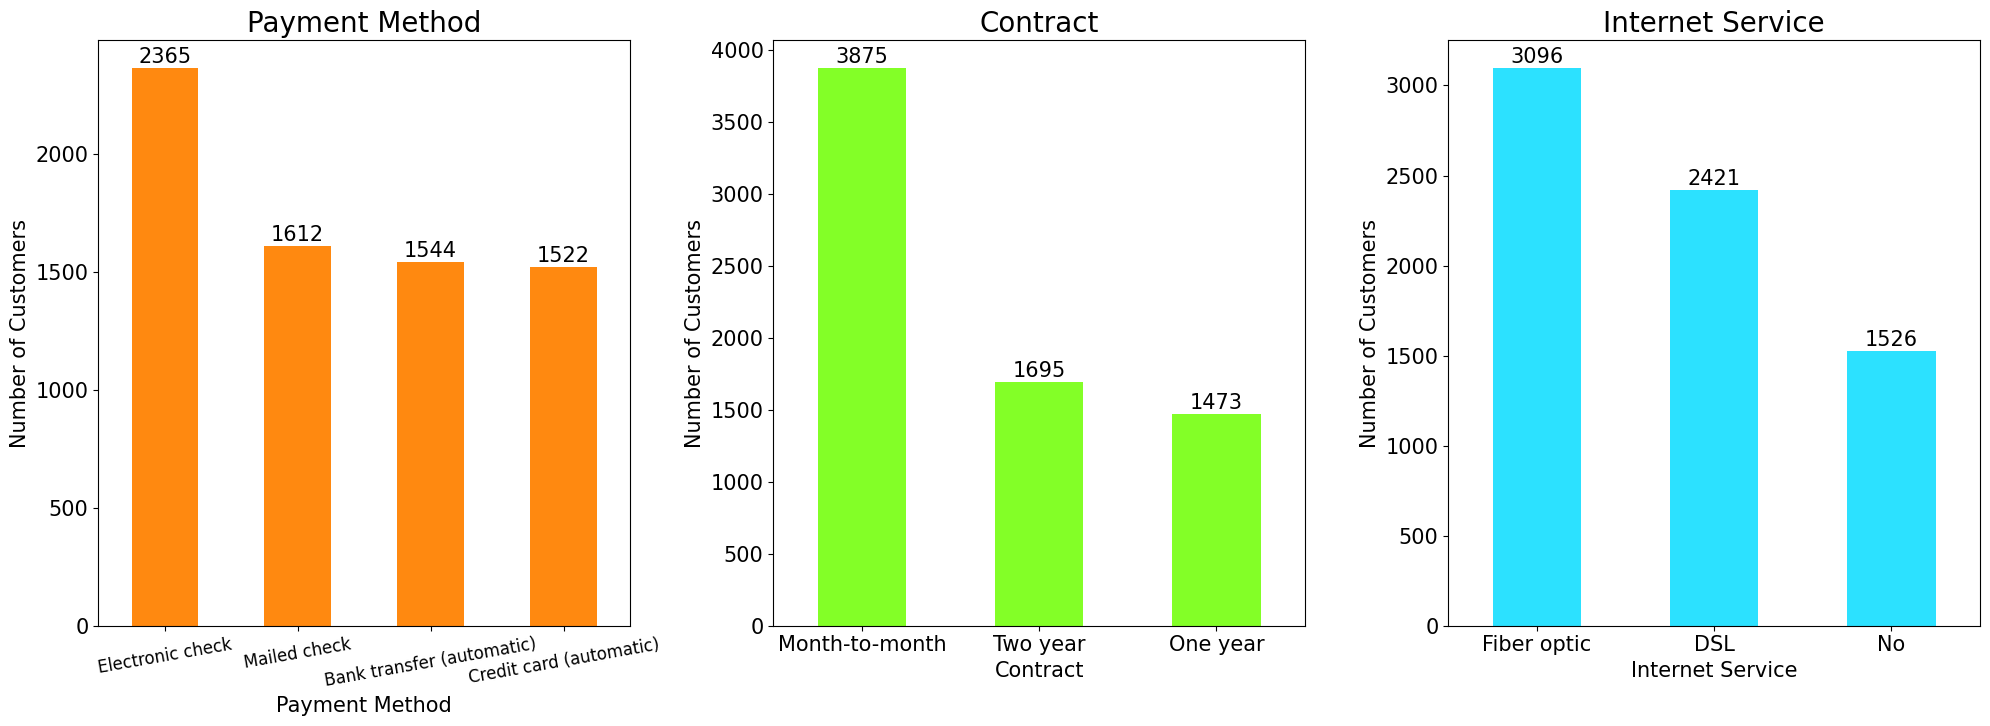

In [8]:
payment_counts = df['PaymentMethod'].value_counts()
contract_counts = df['Contract'].value_counts()
internet_counts = df['InternetService'].value_counts()

# Create subplots for each bar chart
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))  # Larger figsize

# Bar chart for PaymentMethod
payment_counts.plot(kind='bar', ax=axes[0], color='#FF8910')
axes[0].set_title('Payment Method',fontsize=20)
axes[0].set_xlabel('Payment Method',fontsize=15)
axes[0].set_ylabel('Number of Customers',fontsize=15)
axes[0].tick_params(axis='x', labelrotation=10, labelsize=12)  # Rotate x-labels
axes[0].tick_params(axis='y', labelrotation=0, labelsize=15)  # Rotate y-labels

fontsize1=15
fontsize_x_axis=9
# Annotate bars with count values
for idx, count in enumerate(payment_counts):
    axes[0].text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=fontsize1)

# Bar chart for Contract
contract_counts.plot(kind='bar', ax=axes[1], color='#83FF27')
axes[1].set_title('Contract',fontsize=20)
axes[1].set_xlabel('Contract',fontsize=15)
axes[1].set_ylabel('Number of Customers',fontsize=15)
axes[1].tick_params(axis='x', labelrotation=0, labelsize=15)  # Rotate x-labels
axes[1].tick_params(axis='y', labelrotation=0, labelsize=15)  # Rotate y-labels

# Annotate bars with count values
for idx, count in enumerate(contract_counts):
    axes[1].text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=fontsize1)

# Bar chart for InternetService
internet_counts.plot(kind='bar', ax=axes[2], color='#2CE1FF')
axes[2].set_title('Internet Service',fontsize=20)
axes[2].set_ylabel('Number of Customers',fontsize=15)
axes[2].tick_params(axis='x', labelrotation=0, labelsize=15 )  # Rotate x-labels and set font size
axes[2].tick_params(axis='y', labelrotation=0, labelsize=15)  # Rotate y-labels
axes[2].set_xlabel('Internet Service',fontsize=15)

# Annotate bars with count values
for idx, count in enumerate(internet_counts):
    axes[2].text(idx, count + 5, str(count), ha='center', va='bottom', fontsize=fontsize1)

# Adjust layout and display the plots with increased spacing
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect parameter to increase vertical spacing
plt.show()
#------

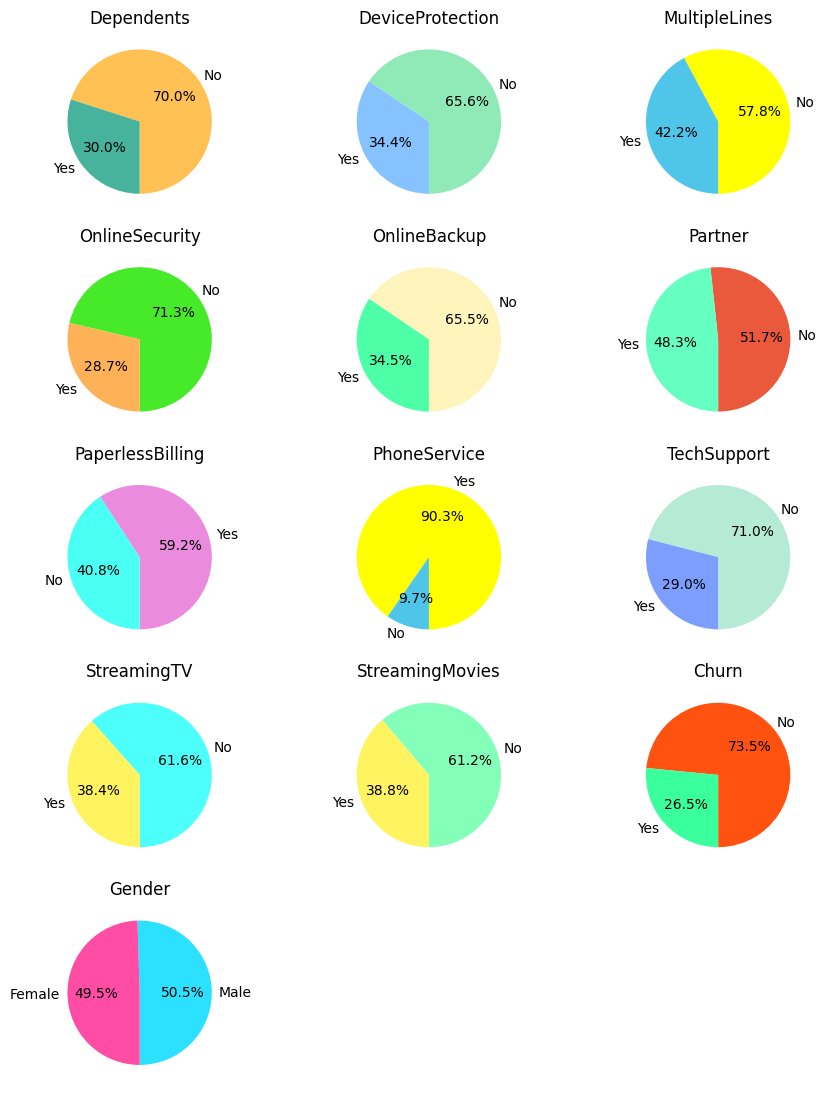

In [9]:
# List of features to plot
features_to_plot = ['Dependents', 'DeviceProtection', 'MultipleLines', 'OnlineSecurity',
                    'OnlineBackup', 'Partner', 'PaperlessBilling', 'PhoneService',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn', 'Gender']

# Create subplots for the specified features
num_rows = 5
num_cols = 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(9, 12))

colors = [['#FFC154','#47B39C'],['#8FEAB7','#85C2FF'],
         ['#FFFF00','#50C5EA'],['#47EA28','#FFB157'],
          
         ['#FFF4BB','#4DFFA6'],['#EA593B','#64FFC1'],
         ['#EA8BDD','#4AFFF3'],['#FFFF00','#50C5EA'],
          
         ['#B5EAD5','#7B9EFF'],['#4DFFFA','#FFF45F'],
         ['#83FFB9','#FFF45F'],['#FF5110','#39FF9D'],
          
         ['#2CE1FF','#FF4DA6']]

startangles = [270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270, 270]
# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through features and create pie charts
for i, feature in enumerate(features_to_plot):
    ax = axes[i]
    value_counts = df[feature].value_counts()
    
    ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%',
           colors = colors[i % len(colors)], startangle=startangles[i % len(startangles)])
    ax.set_title(feature)

# Hide remaining empty subplots
for i in range(len(features_to_plot), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect parameter to increase vertical spacing
plt.show()

### TotalCharges and Tenure Analysis
Analyzing the 'TotalCharges' and 'Tenure' features, handling missing values, and visualizing their distribution across different contract types.

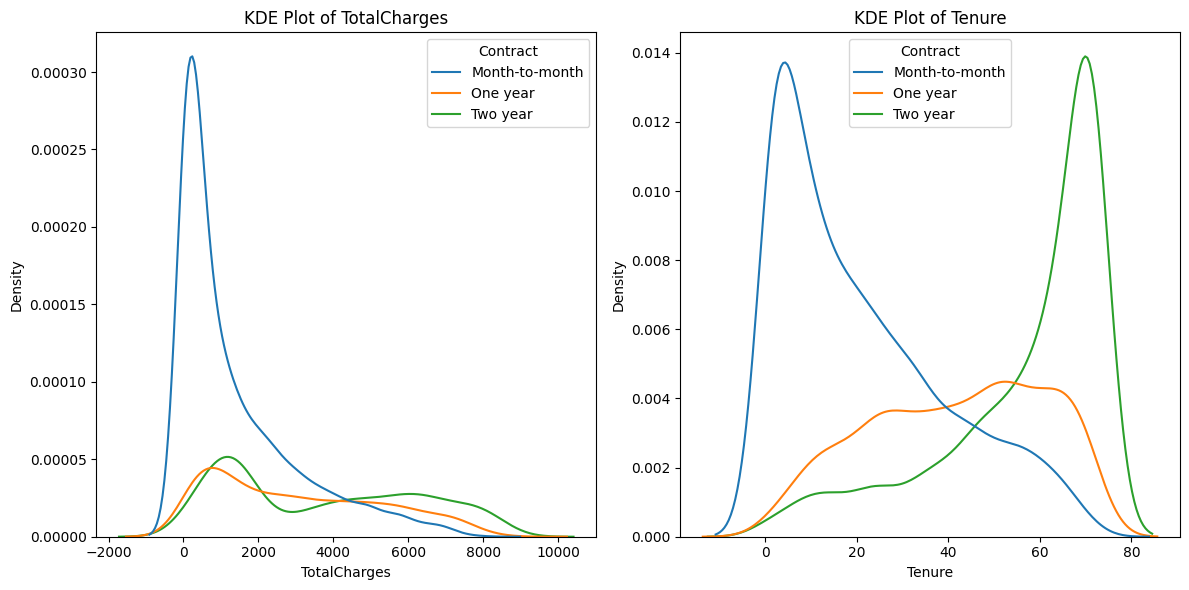

Sum of TotalCharges for each contract type
Contract
Month-to-month    5305861.500
One year          4468450.975
Two year          6297228.450
Name: TotalCharges, dtype: float64
Sum of users of each type of contracts
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64
The mean tenure for each contract type
Contract
Month-to-month    21.033333
One year          41.674063
Two year          56.602914
Name: Tenure, dtype: float64


In [10]:
# df = df[df['TotalCharges'].str.strip() != '']

# # Reset the index of the DataFrame
# df['TotalCharges'] = df['TotalCharges'].astype(float)
# df['TotalCharges'].fillna(df['TotalCharges'].median())

# sns.kdeplot(data = df,x='TotalCharges',hue = 'Contract')

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Convert 'Tenure' to numeric and replace non-numeric values with NaN
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')

# Filter the DataFrame for 'Churn' values equal to 'No'
no_churn = df[df['Churn'] == 'No']

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot KDE for 'TotalCharges'
sns.kdeplot(data=df, x='TotalCharges', hue='Contract', ax=ax[0])
ax[0].set_title('KDE Plot of TotalCharges')
ax[0].set_xlabel('TotalCharges')
ax[0].set_ylabel('Density')

# Plot KDE for 'Tenure'
sns.kdeplot(data=no_churn, x='Tenure', hue='Contract', ax=ax[1])
ax[1].set_title('KDE Plot of Tenure')
ax[1].set_xlabel('Tenure')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

print("\033[1mSum of TotalCharges for each contract type\033[0m")
print(df.groupby('Contract').sum()['TotalCharges'])

print("\033[1mSum of users of each type of contracts\033[0m")
print(df['Contract'].value_counts())

print("\033[1mThe mean tenure for each contract type\033[0m")
print(no_churn.groupby('Contract')['Tenure'].mean())

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

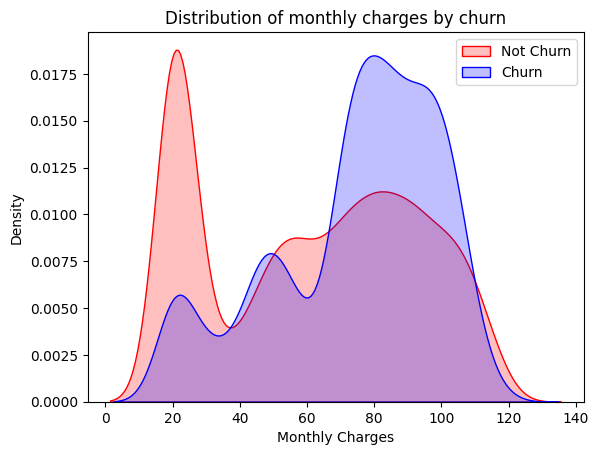

In [11]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')


Text(0.5, 1.0, 'Distribution of total charges by churn')

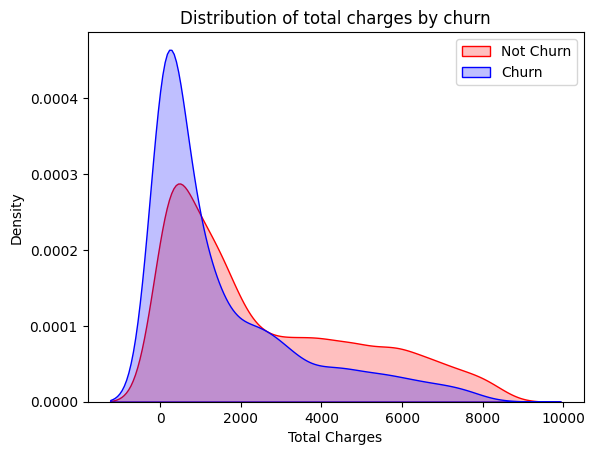

In [12]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

### Label Encoding for Categorical Features
Performing label encoding for categorical features to convert them into numerical format for machine learning algorithms.

In [13]:
# Columns to be encoded
columns_to_encode = ['Gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                     'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                     'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract',
                     'PaperlessBilling', 'PaymentMethod', 'Churn']

# Create a dictionary to map unique values to labels
label_mapping = {
    'Gender': ['Female', 'Male'],
    'Partner': ['No', 'Yes'],
    'Dependents': ['No', 'Yes'],
    'PhoneService': ['No', 'Yes'],
    'MultipleLines' : ['No', 'Yes'],
    'InternetService' : ['DSL', 'Fiber optic', 'No'],
    'OnlineSecurity' : ['No', 'Yes'],
    'OnlineBackup' : ['No', 'Yes'],
    'TechSupport' : ['No', 'Yes'],
    'DeviceProtection' : ['No', 'Yes',],
    'StreamingTV' : ['No', 'Yes'],
    'StreamingMovies' : ['No', 'Yes'],
    'Contract' : ['Month-to-month','Two year','One year'],
    'PaperlessBilling' :['No','Yes'],
    'PaymentMethod' : ['Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'],
    'Churn': ['No', 'Yes']
}

# Loop through columns and perform label encoding
for column in columns_to_encode:
    le = preprocessing.LabelEncoder()
    unique_values = label_mapping.get(column, df[column].unique())
    df[column] = le.fit_transform(df[column])

# 0-> No,  1 -> Yes
# 0-> Female,  1 -> Male
# 0->Month-to-month, 1->One year, 2->Two year
# 0->Bank transfer (automatic), 1->Credit card (automatic), 2->Electronic check, 3->Mailed check
# DSL ->0, Fiber->1, No->2

In [14]:
df.describe()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.574329,64.761692,2281.916928,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.068104,30.090047,2265.270398,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [15]:
df.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,1,1,0,0,0,0,1,0,0,56.15,3487.95,0


### Feature Selection
Selecting the top k best features using the SelectKBest algorithm and the chi-squared test, and creating a new DataFrame with only the selected features along with the target column 'Churn'.

We also used the RandomForestClassifier, ExhaustiveFeatureSelector, and the GenericUnivariateSelect methods to double check the selected features.

In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']

# Apply SelectKBest
num_features_to_select = 5  # number of features to want to select
select_k_best = SelectKBest(score_func=chi2, k=num_features_to_select)
X_new = select_k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = select_k_best.get_support(indices=True)

# Get the selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Create a new DataFrame with only the selected features
df_selected_features = pd.DataFrame(data=X_new, columns=selected_feature_names)

# Concatenate the target column with the selected features
df_selected_features['Churn'] = y

df_selected_features

,Tenure,OnlineSecurity,Contract,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,29.85,29.85,0
1,34.0,1.0,1.0,56.95,1889.50,0
2,2.0,1.0,0.0,53.85,108.15,1
3,45.0,1.0,1.0,42.30,1840.75,0
4,2.0,0.0,0.0,70.70,151.65,1
...,...,...,...,...,...,...
7038,24.0,1.0,1.0,84.80,1990.50,0
7039,72.0,0.0,1.0,103.20,7362.90,0
7040,11.0,1.0,0.0,29.60,346.45,0
7041,4.0,0.0,0.0,74.40,306.60,1


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

X = df.drop(['Churn'], axis=1)

y = df['Churn'] # set dependent variables

sel = SelectFromModel(RandomForestClassifier(n_estimators = 25)) 
sel.fit(X,y)


selected_feature_mask = sel.get_support()
selected_feature_mask.shape
# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_mask]
selected_feature_mask1 = sel.transform(X)

# Display the selected feature names
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [18]:
X = df.drop(['Churn'], axis=1)

y = df['Churn'] # set dependent variables

transformer = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=5)  # Adjust param value as needed
# Fit and transform the data
X_new = transformer.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = transformer.get_support()

# Get the names of the selected features
selected_feature_names = X.columns[selected_feature_indices]

# Display the selected feature names
print("Selected Features:")
print(selected_feature_names)
m = list(selected_feature_names)
df[m]

Selected Features:
Index(['Tenure', 'Contract', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges'],
      dtype='object')


,Tenure,Contract,PaperlessBilling,MonthlyCharges,TotalCharges
0,1,0,1,29.85,29.85
1,34,1,0,56.95,1889.50
2,2,0,1,53.85,108.15
3,45,1,0,42.30,1840.75
4,2,0,1,70.70,151.65
...,...,...,...,...,...
7038,24,1,1,84.80,1990.50
7039,72,1,1,103.20,7362.90
7040,11,0,1,29.60,346.45
7041,4,0,1,74.40,306.60


### Feature-Specific Accuracy Calculation using Logistic Regression
This code snippet focuses on calculating accuracy scores for specific features in a dataset using logistic regression. It defines a list of selected features, splits the dataset into training and testing sets, and then employs logistic regression to predict outcomes. The accuracy score for each individual feature is computed and presented in percentage form. This approach provides insights into how well the logistic regression model performs for each feature independently.

In [19]:
# Define the list of features
features = ['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity', 'PaymentMethod']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Churn'], test_size=0.2, random_state=1)

def get_accuracy(feature):
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]
    
    predictions, score = get_predictions(X_train_feature, y_train, X_test_feature, y_test)
    
    return score

def get_predictions(X_train, y_train, X_test, y_test):
    model = LogisticRegression(C=0.01, solver='liblinear')
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    return predictions, score

# Calculate and print accuracy scores for each feature
for feature in features:
    accuracy = get_accuracy(feature)
    print(f'{feature} accuracy score: {accuracy * 100:.2f}%')

Tenure accuracy score: 75.09%
Contract accuracy score: 75.30%
MonthlyCharges accuracy score: 75.30%
TotalCharges accuracy score: 75.30%
OnlineSecurity accuracy score: 75.30%
PaymentMethod accuracy score: 75.30%


### Hypothesis testing by applying Chi-Square Test for Categorical Feature Independence
Performing the chi-square test for independence between categorical variables and the target variable 'Churn' to determine if there is a significant relationship and to accept or reject the null hypothesis.

In [20]:
# Select categorical variables and churn
categorical_vars = ['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity']
churn = "Churn"

'''
H0 = There is no significant relationship between the feature selected and Churn.
Ha = There is a significant relationship between the feature selected and Churn.
'''

for categorical_var in categorical_vars:
    # Create a contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[churn])

    # Perform the Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Set significance level
    significance = 0.05

    # Compare p-value with significance level
    if p_value < significance:
        print(f"P-value for {categorical_var}: {p_value:.4f}. Reject the null hypothesis. There is a significant relationship between {categorical_var} and {churn}.")
    else:
        print(f"P-value for {categorical_var}: {p_value:.4f}. Fail to reject the null hypothesis. There is no significant relationship between {categorical_var} and {churn}.")


P-value for Tenure: 0.0000. Reject the null hypothesis. There is a significant relationship between Tenure and Churn.
P-value for Contract: 0.0000. Reject the null hypothesis. There is a significant relationship between Contract and Churn.
P-value for MonthlyCharges: 0.0000. Reject the null hypothesis. There is a significant relationship between MonthlyCharges and Churn.
P-value for TotalCharges: 0.5532. Fail to reject the null hypothesis. There is no significant relationship between TotalCharges and Churn.
P-value for OnlineSecurity: 0.0000. Reject the null hypothesis. There is a significant relationship between OnlineSecurity and Churn.


### Proportion of Churned Customers by Categorical Variable
Visualizing the proportion of churned customers for each category of selected categorical variables using bar plots.

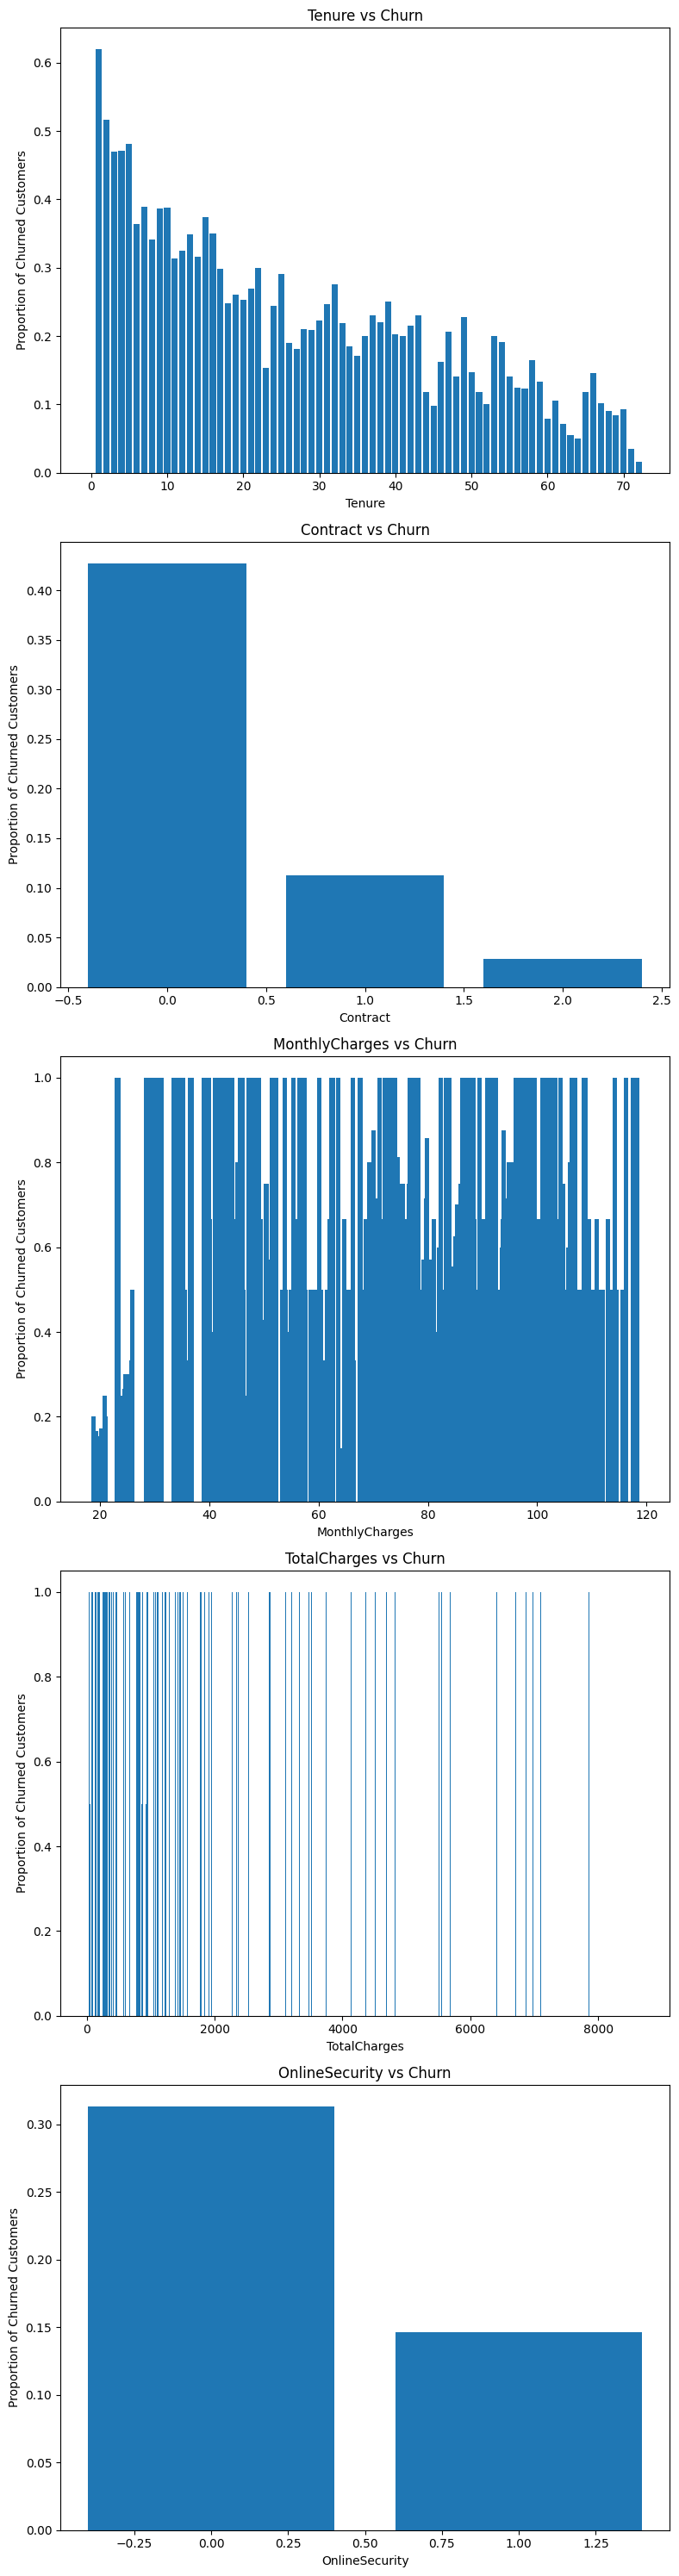

In [21]:
# Select categorical variables and churn
categorical_vars = ['Tenure', 'Contract', 'MonthlyCharges', 'TotalCharges', 'OnlineSecurity']
churn = 'Churn'

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 6 * len(categorical_vars)))

for i, categorical_var in enumerate(categorical_vars):
    # Create a contingency table
    contingency_table = pd.crosstab(df[categorical_var], df[churn])

    # Perform the Chi-Square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate the proportion of churned customers for each category
    churn_proportion = contingency_table[1] / contingency_table.sum(axis=1)

    # Plot the bar plot
    ax = axes[i]
    ax.bar(churn_proportion.index, churn_proportion.values)
    ax.set_title(f"{categorical_var} vs Churn")
    ax.set_xlabel(categorical_var)
    ax.set_ylabel("Proportion of Churned Customers")

plt.tight_layout()
plt.show()

### Visualizing Churn Analysis
Creating various visualizations to analyze churn in the dataset, including histograms of tenure and monthly charges, as well as a count plot comparing contract types and churn.

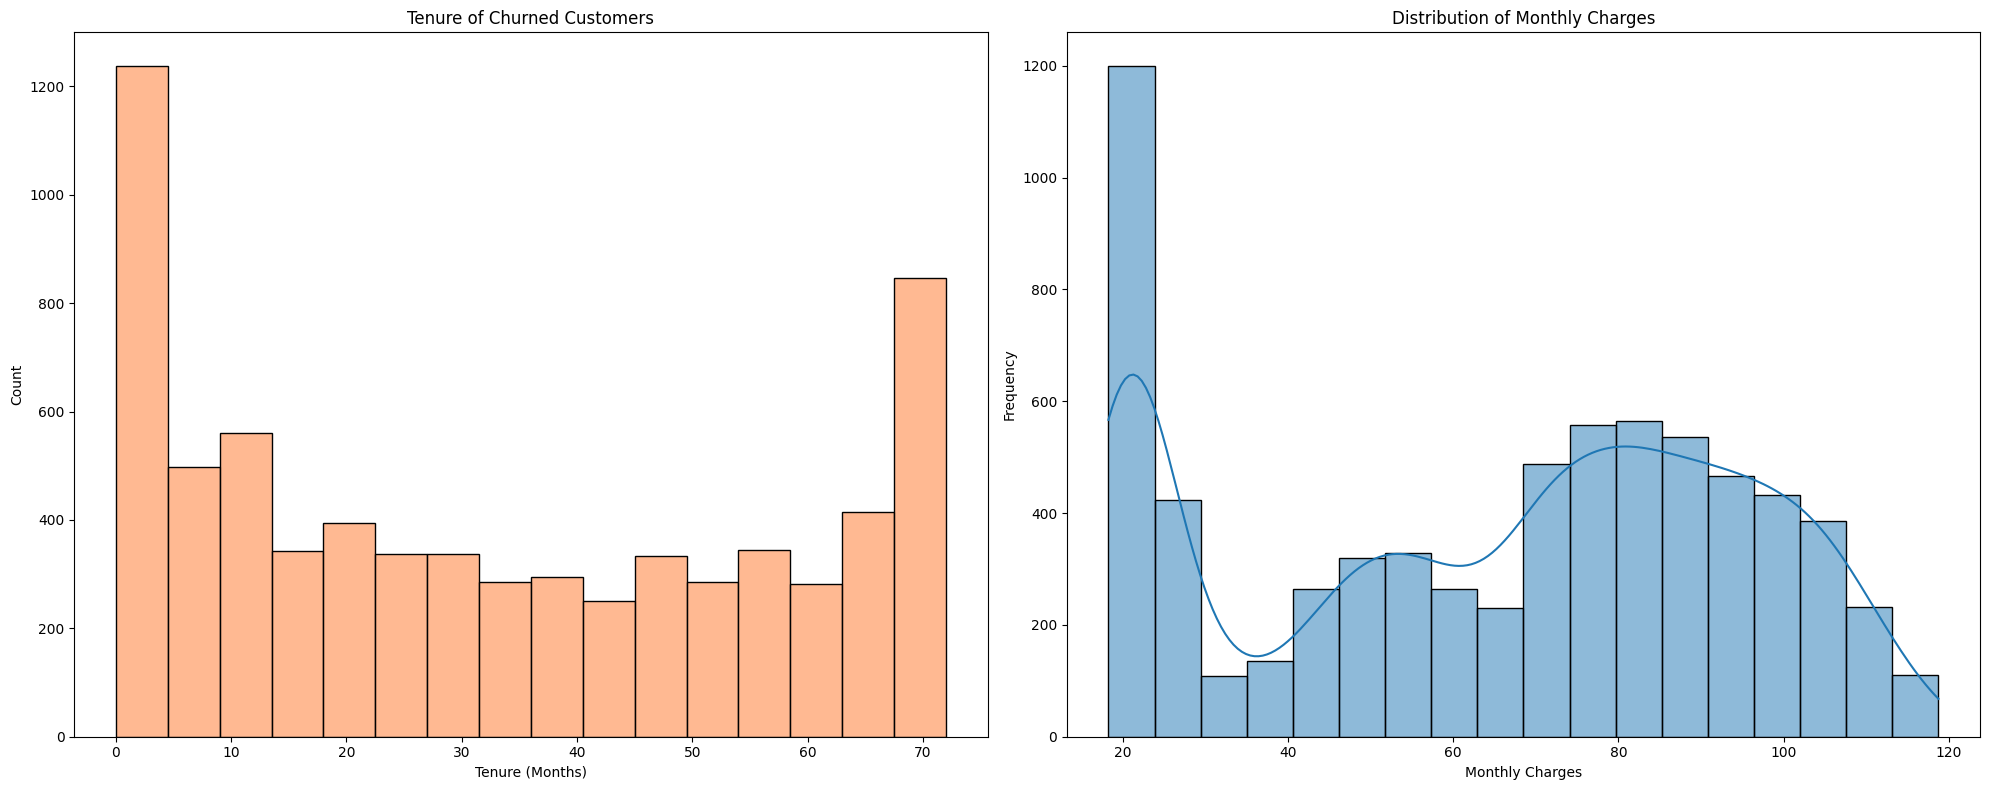

In [22]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Plot 1: Tenure of Churned Customers
sns.histplot(df['Churn'], x=df['Tenure'], bins='auto', color='#ffa26e', ax=axes[0])
axes[0].set_xlabel("Tenure (Months)")
axes[0].set_ylabel("Count")
axes[0].set_title("Tenure of Churned Customers")

# Plot 2: Distribution of Monthly Charges
sns.histplot(df['MonthlyCharges'], bins='auto', kde=True, ax=axes[1])
axes[1].set_xlabel("Monthly Charges")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Distribution of Monthly Charges")

# Adjust spacing between subplots
plt.tight_layout()

# Display the combined plot
plt.show()

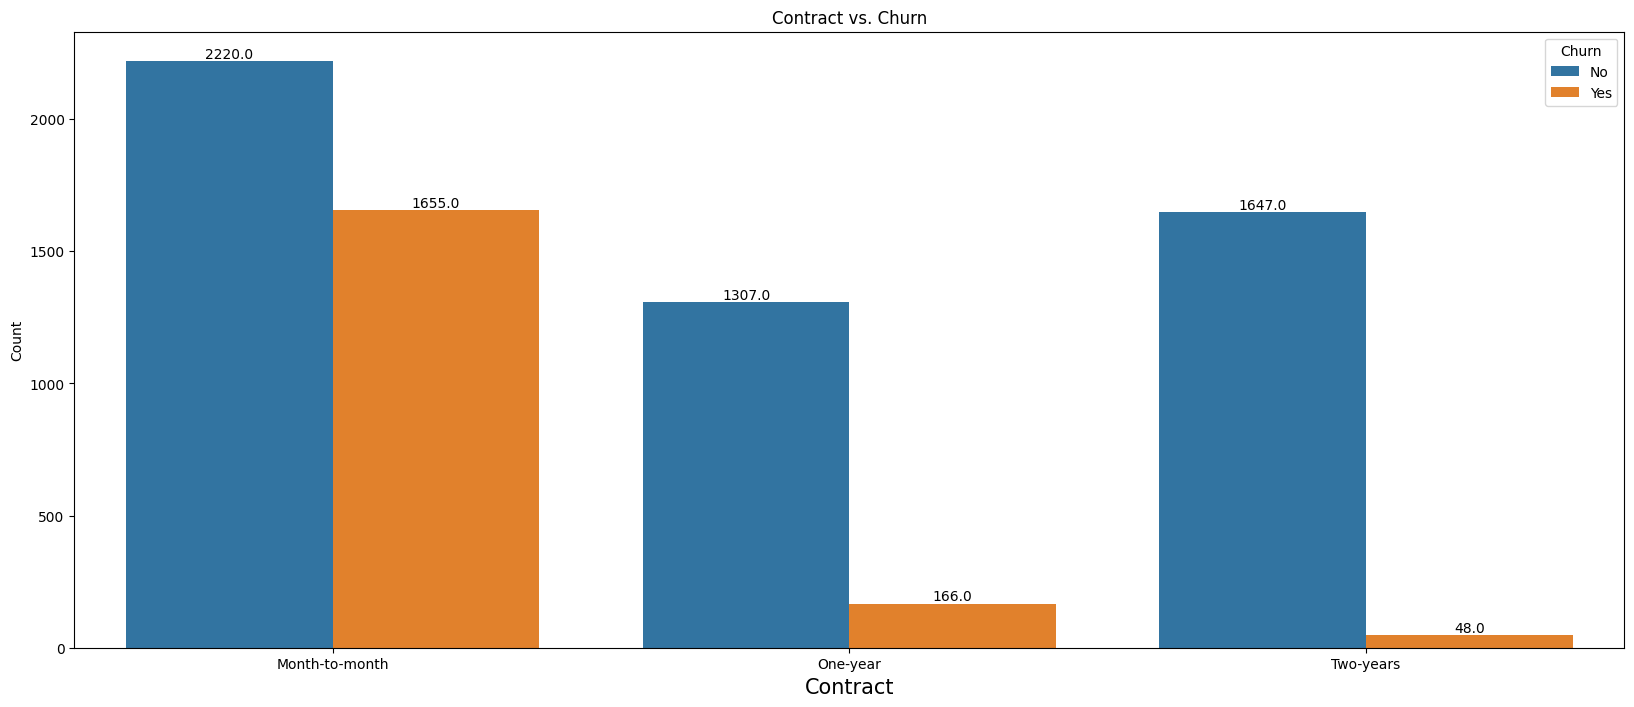

In [23]:
plt.figure(figsize=(20, 8))  
ax = sns.countplot(x='Contract', hue='Churn', data=df)
ax.set_xticklabels(('Month-to-month', 'One-year', 'Two-years'))
ax.tick_params(axis='x', labelsize=10)

# Adding labels and title
plt.xlabel("Contract", size=15)
plt.ylabel("Count")
plt.title("Contract vs. Churn")

# Calculating the count for each category
total = len(df)
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count}', ha='center', va='bottom')

# Displaying the count plot
plt.legend(title="Churn", loc='upper right', labels=['No', 'Yes'])
plt.show()

### Comparing Classification Models
Comparing the performance of various classification models on the training dataset and displaying mean accuracy and confusion matrix.

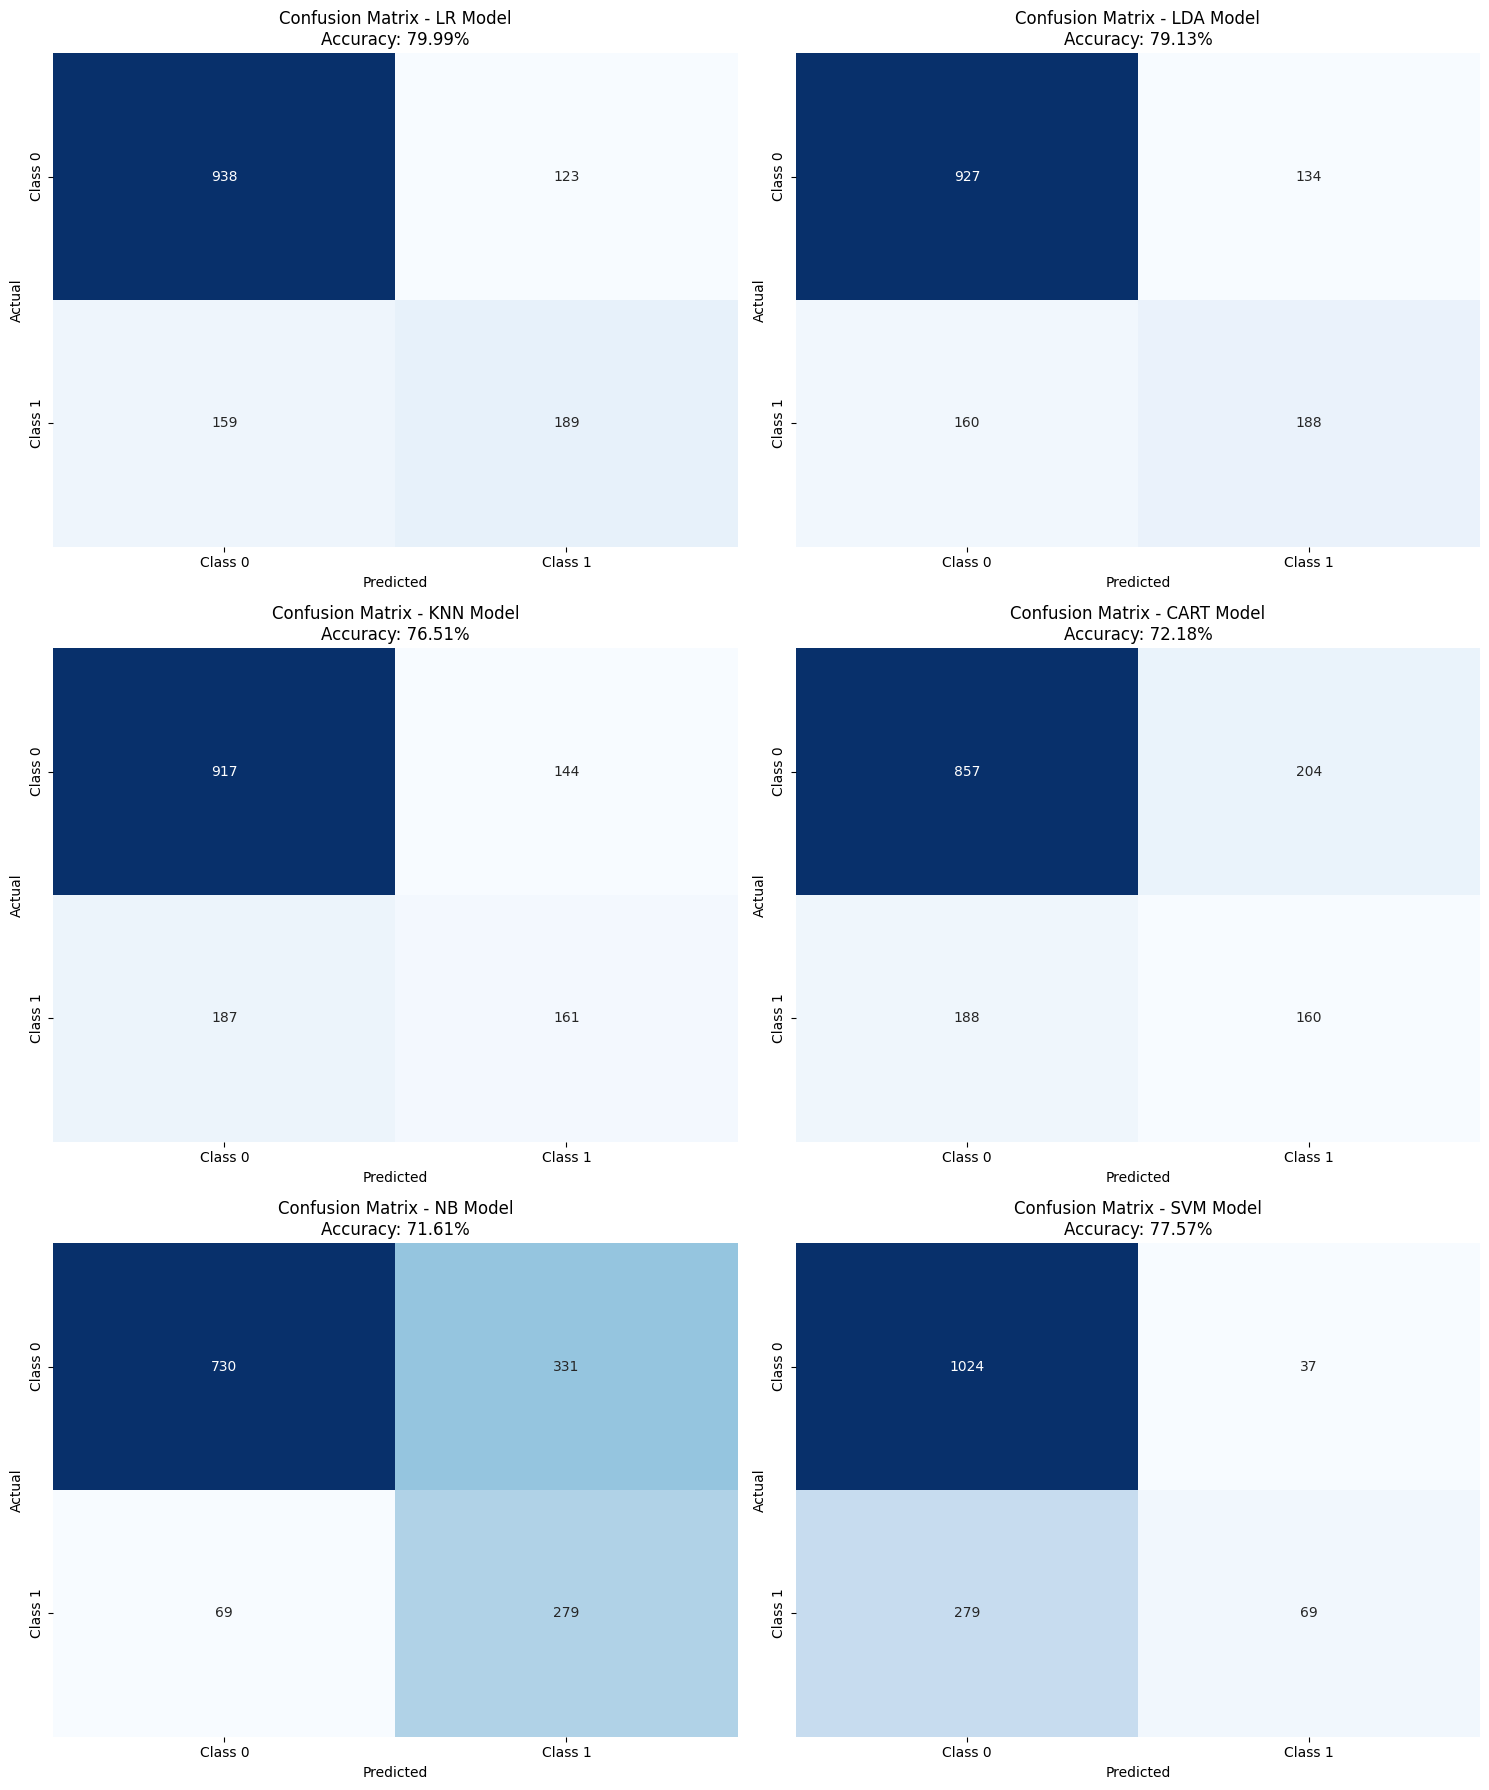

In [24]:
# Define models
models = []
models.append(('LR', LogisticRegression(C=0.01, solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# Define X and y
y = df['Churn']
X = df[['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create subplots for confusion matrix plots
num_models = len(models)
num_cols = 2  # Number of columns in the subplot grid
num_rows = (num_models + 1) // num_cols  # Calculate the number of rows

# Set up the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6 * num_rows))
axes = axes.ravel()

# Evaluate each model and generate confusion matrix plots
for i, (name, model) in enumerate(models):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions) * 100
    
    # Confusion matrix
    cm = confusion_matrix(y_test, predictions)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
    axes[i].set_title(f"Confusion Matrix - {name} Model\nAccuracy: {accuracy:.2f}%")
    axes[i].set_xticks([0.5, 1.5])
    axes[i].set_yticks([0.5, 1.5])
    axes[i].set_xticklabels(["Class 0", "Class 1"])
    axes[i].set_yticklabels(["Class 0", "Class 1"])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()


### Logistic Regression Model Evaluation and Confusion Matrix
After determining that the Logistic Regression model has the highest accuracy, we implement the following:

Training a Logistic Regression model, making predictions on the test set, calculating accuracy, generating a classification report, jaccard index, and visualizing the confusion matrix.

In [25]:
model1 = LogisticRegression(C=0.01, solver='liblinear')
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))
print(classification_report(y_test, predictions))

Accuracy: 79.99%
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1061
           1       0.61      0.54      0.57       348

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



In [26]:
jaccard_score(y_test, predictions,pos_label=0)

0.7688524590163934

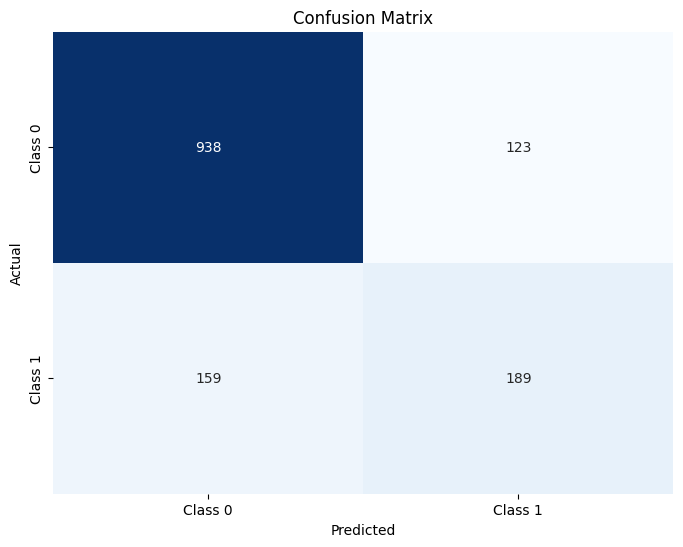

In [27]:
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks([0.5, 1.5], ["Class 0", "Class 1"])
plt.yticks([0.5, 1.5], ["Class 0", "Class 1"])
plt.show()

### Features extraction
Trying to extract features and calculate the model accuracy after involving these features to find out if there are benefits from using them. 

In [28]:
df['TotalPayment'] = df['Tenure'] * df['MonthlyCharges']
# The total payment over the tenure period.

y = df['Churn']
X = df[['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges', 'TotalPayment']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

Accuracy: 79.77%


In [29]:
df['HasOnlineSecurityBackup'] = df['OnlineSecurity'] & df['OnlineBackup']
df['HasTechSupportAndDeviceProtection'] = df['TechSupport'] & df['DeviceProtection']
# This feature indicating whether the customer has both features.

y = df['Churn']
X = df[['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges', 'HasOnlineSecurityBackup', 'HasTechSupportAndDeviceProtection']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

Accuracy: 80.13%


In [30]:
service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']  # Add more columns as needed

df['AdditionalServices'] = df[service_columns].sum(axis=1)
# This feature indicating the number of additional services the customer has.

y = df['Churn']
X = df[['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges', 'AdditionalServices']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

Accuracy: 79.56%


In [31]:
df['MonthlyToTotalChargesRatio'] = df['MonthlyCharges'] / df['TotalCharges']
# The ration between monthly and total charges.

y = df['Churn']
X = df[['Tenure', 'OnlineSecurity', 'Contract', 'MonthlyCharges', 'TotalCharges', 'MonthlyToTotalChargesRatio']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = LogisticRegression(C=0.01, solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy: %.2f%%' % (accuracy_score(y_test, predictions) * 100))

Accuracy: 80.41%


### Making Predictions with a Trained Model
This code demonstrates how to utilize a trained machine learning model to make predictions on new, unseen data.

In [32]:
# Preparing new data (replace with your actual new data)
new_data = pd.DataFrame({
    'Tenure': [12],
    'OnlineSecurity': [0],
    'Contract': [1],
    'MonthlyCharges': [60.0],
    'TotalCharges': [720.0]
})

# Making predictions on new data
new_predictions = model1.predict(new_data)

# Display the predictions
if new_predictions[0] == 0:
    print("Predicted: The customer will not churn.")
else:
    print("Predicted: The customer will churn.")

Predicted: The customer will not churn.
